In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/MPG.csv')

In [7]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [8]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [10]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [13]:
df = df.dropna()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


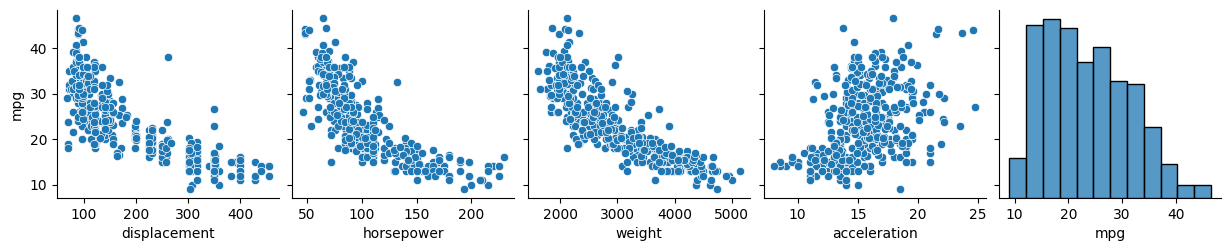

In [15]:
sns.pairplot(df, x_vars = ['displacement', 'horsepower', 'weight', 'acceleration', 'mpg'], y_vars = 'mpg')

<Axes: xlabel='displacement', ylabel='mpg'>

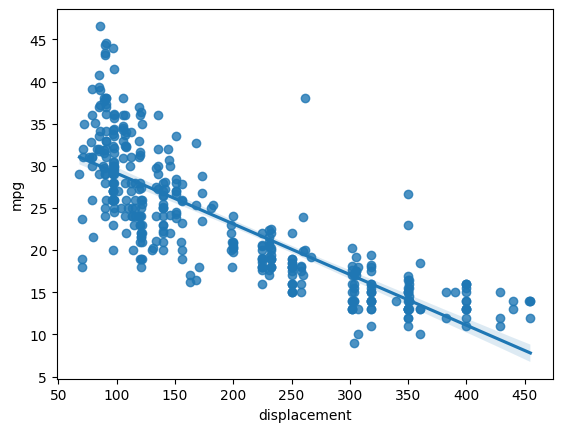

In [16]:
sns.regplot(x = 'displacement', y = 'mpg', data = df)

In [17]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [18]:
y = df['mpg']
y.shape

(392,)

In [19]:
x = df[['displacement', 'horsepower', 'weight', 'acceleration']]
x.shape

(392, 4)

In [20]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)
pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


In [21]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.7)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((274, 4), (118, 4), (274,), (118,))

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [23]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [24]:
lr.intercept_

23.525768440757975

In [25]:
lr.coef_

array([-0.28810351, -1.97903208, -4.38624244,  0.13530989])

In [26]:
y_pred = lr.predict(xtest)
y_pred

array([17.36183648, 26.61507861, 18.50022524, 22.96258607, 11.44404634,
       29.82488017, 22.94677288, 17.99664134, 25.84852771, 26.41053845,
       15.07162966, 26.25231883, 23.21108866, 31.86951735, 30.44478327,
       30.74423484, 29.06508789, 14.93353042, 26.27305371, 23.33464841,
       26.50262578, 25.00980357, 10.9029835 , 30.7798513 , 24.09172951,
       30.47067865, 31.23267337, 17.1891393 , 28.94487528, 24.48700726,
       24.55692138, 25.9355545 , 18.43916234, 28.96601286, 11.19261662,
       24.78804317, 28.07337702, 27.10595011, 21.413767  , 23.48866496,
        9.61963486, 29.99818515, 29.96928723, 27.3853472 , 26.60331715,
       18.99808424, 29.52592061, 28.03773335, 30.8550895 ,  8.83709931,
       16.19919489, 27.50136286, 11.04027938,  9.47609374, 14.75643446,
       30.48483876, 26.33402139, 18.73665547, 27.72699496, 15.26560376,
       22.83507749, 27.1773983 , 19.52017754, 27.04724767, 21.05507272,
       29.19660491, 25.81355144, 29.2522318 , 23.04679265, 15.17

In [27]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
mean_absolute_error(ytest, y_pred)

3.3273841573980114

In [28]:
mean_absolute_percentage_error(ytest, y_pred)

0.14377538882974586

In [29]:
r2_score(ytest, y_pred)

0.6862360358845381

In [30]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)
x_train2 = poly.fit_transform(xtrain)
x_test2 = poly.fit_transform(xtest)
lr.fit(x_train2, ytrain)

LinearRegression()

In [31]:
lr.intercept_

21.293791884433116

In [32]:
lr.coef_

array([-2.2205748 , -5.66576681, -1.31226633, -0.96239237,  1.12010893,
        0.08887028,  0.32874426,  0.97395363, -1.09000224,  0.59811731])

In [33]:
y_pred_poly = lr.predict(x_test2)

In [34]:
mean_absolute_error(ytest, y_pred_poly)

3.0712670128940682

In [35]:
mean_absolute_percentage_error(ytest, y_pred_poly)

0.12969937621735417

In [36]:
r2_score(ytest, y_pred_poly)

0.7128735687691391